# WordCloud 한글 설정 연습하기

In [135]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from konlpy.tag import Kkma
from collections import Counter
from nltk.corpus import stopwords

In [136]:
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)

font_path = "c:/Windows/Fonts/malgun.ttf"

In [137]:
# 영화 아이언맨 시놉시스
text = """
영웅은 태어나지 않는다! 다만 만들어질 뿐이다!천재적인 두뇌와 재능으로 세계 최강의 무기업체를 이끄는 CEO이자, 타고난 매력으로 셀러브리티 못지않은 화려한 삶을 살아가던 억만장자 토니 스타크. 아프가니스탄에서 자신이 개발한 신무기 발표를 성공리에 마치고 돌아가던 그는 게릴라군의 갑작스런 공격에 의해 가슴에 치명적인 부상을 입고 게릴라군에게 납치된다. 가까스로 목숨을 건진 그에게 게릴라군은 자신들을 위한 강력한 무기를 개발하라며 그를 위협한다. 그러나 그는 게릴라군을 위한 무기 대신, 탈출을 위한 무기가 장착된 철갑수트를 몰래 만드는 데 성공하고, 그의 첫 수트인 ‘Mark1’를 입고 탈출에 성공한다.최강의 하이테크 슈퍼 히어로, ‘아이언맨’의 탄생!미국으로 돌아온 토니 스타크는 자신이 만든 무기가 많은 사람들의 생명을 위협하고, 세상을 엄청난 위험에 몰아넣고 있다는 사실을 깨닫고 무기사업에서 손 뗄 것을 선언한다. 그리고, Mark1을 토대로 최강의 하이테크 수트를 개발하는 데 자신의 천재적인 재능과 노력을 쏟아 붓기 시작한다. 탈출하는 당시 부서져버린 Mark1를 바탕으로 보다 업그레이드 된 수트 Mark2를 만들어낸 토니 스타크. 거기에 만족하지 않고, 숱한 시행착오와 실패 끝에 자신의 모든 능력과 현실에서 가능한 최강의 최첨단 과학 기술이 집적된 하이테크 수트 Mark3를 마침내 완성, 최강의 슈퍼히어로 ‘아이언맨’으로 거듭난다. 아이언맨 VS 아이언 몽거토니 스타크가 탈출하는 과정을 통해 Mark1의 가공할 위력을 확인한 게릴라 군은 토니 스타크가 미처 회수하지 못한 Mark1의 잔해와 설계도를 찾아낸다. Mark1을 재조립하여 그들의 목적을 이루기 위한 거대하고 강력한 철갑수트를 제작하려는 음모를 꾸미는 게릴라군. 토니 스타크가 갖고 있던 에너지원을 훔쳐 ‘아이언맨’을 능가하는 거대하고 강력한 ‘아이언 몽거’를 완성한 그들은 세계 평화를 위협하고, 토니 스타크는 그들의 음모과 배후세력이 누구인지를 알게 되는데...!영웅은 태어나지 않는다! 다만 만들어질 뿐이다!천재적인 두뇌와 재능으로 세계 최강의 무기업체를 이끄는 CEO이자, 타고난 매력으로 셀러브리티 못지않은 화려한 삶을 살아가던 억만장자 토니 스타크. 아프가니스탄에서 자신이 개발한 신무기 발표를 성공리에 마치고 돌아가던 그는 게릴라군의 갑작스런 공격에 의해 가슴에 치명적인 부상을 입고 게릴라군에게 납치된다. 가까스로 목숨을 건진 그에게 게릴라군은 자신들을 위한 강력한 무기를 개발하라며 그를 위협한다. 그러나 그는 게릴라군을 위한 무기 대신, 탈출을 위한 무기가 장착된 철갑수트를 몰래 만드는 데 성공하고, 그의 첫 수트인 ‘Mark1’를 입고 탈출에 성공한다.최강의 하이테크 슈퍼 히어로, ‘아이언맨’의 탄생!미국으로 돌아온 토니 스타크는 자신이 만든 무기가 많은 사람들의 생명을 위협하고, 세상을 엄청난 위험에 몰아넣고 있다는 사실을 깨닫고 무기사업에서 손 뗄 것을 선언한다. 그리고, Mark1을 토대로 최강의 하이테크 수트를 개발하는 데 자신의 천재적인 재능과 노력을 쏟아 붓기 시작한다. 탈출하는 당시 부서져버린 Mark1를 바탕으로 보다 업그레이드 된 수트 Mark2를 만들어낸 토니 스타크. 거기에 만족하지 않고, 숱한 시행착오와 실패 끝에 자신의 모든 능력과 현실에서 가능한 최강의 최첨단 과학 기술이 집적된 하이테크 수트 Mark3를 마침내 완성, 최강의 슈퍼히어로 ‘아이언맨’으로 거듭난다. 아이언맨 VS 아이언 몽거토니 스타크가 탈출하는 과정을 통해 Mark1의 가공할 위력을 확인한 게릴라 군은 토니 스타크가 미처 회수하지 못한 Mark1의 잔해와 설계도를 찾아낸다. Mark1을 재조립하여 그들의 목적을 이루기 위한 거대하고 강력한 철갑수트를 제작하려는 음모를 꾸미는 게릴라군. 토니 스타크가 갖고 있던 에너지원을 훔쳐 ‘아이언맨’을 능가하는 거대하고 강력한 ‘아이언 몽거’를 완성한 그들은 세계 평화를 위협하고, 토니 스타크는 그들의 음모과 배후세력이 누구인지를 알게 되는데...!
"""

In [138]:
lst = Kkma().morphs(text)

In [139]:
cnt = Counter(lst)

In [140]:
most_cnt = cnt.most_common(100)

In [141]:
my_stopwords = [',', '.', 'ㄴ', '은', '는', '이', '가', '에', '을', '를', '위한']

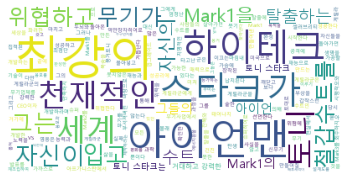

In [142]:
wc = WordCloud(background_color='white', font_path="c:/Windows/Fonts/malgun.ttf", stopwords=my_stopwords)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [143]:
# mask 이미지 만들기
icon = Image.open('./data/iron_man.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

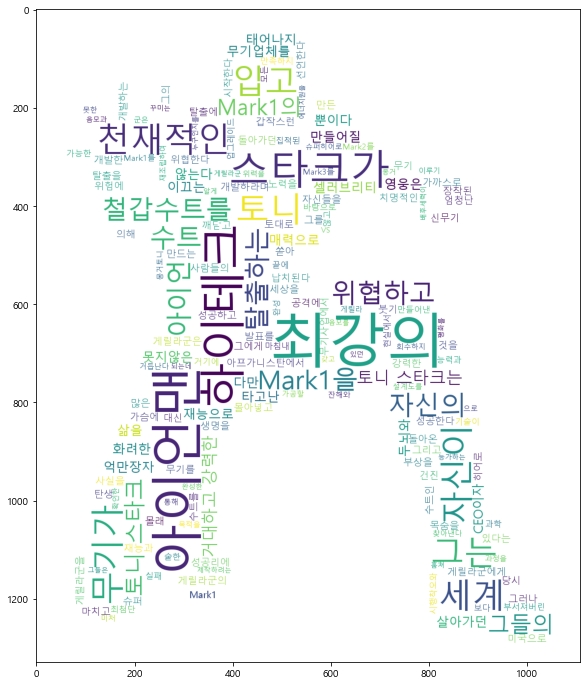

In [144]:
wc = WordCloud(background_color='white', font_path="c:/Windows/Fonts/malgun.ttf", stopwords=my_stopwords, mask=mask)
wc.generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis()
plt.show()